# Level 1 - Task 2: Descriptive Analysis

#   Overview of Problem Statement

With a diverse dataset of restaurants spread across various cities and cuisines, it's essential to perform descriptive statistical analysis to understand key distributions. The aim is to uncover basic numerical insights and identify dominant categories, such as the most popular cities and cuisines represented in the dataset.

#  Objective

1.Compute fundamental statistical measures (mean, median, standard deviation) for numerical columns.

2.Explore the frequency distribution of categorical features like Country Code, City, and Cuisines.

3.Identify the top cities and top cuisines based on the number of restaurants listed in the dataset.



#  Importing necessary libraries

In [1]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Data collection

In [2]:
##  Load Dataset
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# EDA (Exploratory Data Analysis)

In [3]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [4]:
# Numerical columns
numerical_features = df.select_dtypes(include='int').columns
print(numerical_features)

Index(['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range',
       'Votes'],
      dtype='object')


In [5]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object','datetime']).columns
print(categorical_features)

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [6]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 1

In [7]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,12,2,2,2,1,NaN,NaN,6,6,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,Orange,Average,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8652,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000


In [8]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
# Describe the categorical features
print("Statistical description of categorical features:")
df[categorical_features].describe()

Statistical description of categorical features:


,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [10]:
##  Statistical Measures for Numerical Columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Statistical Summary:")
print(df[numerical_cols].describe())

Statistical Summary:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000

# Distribution of Categorical Variables

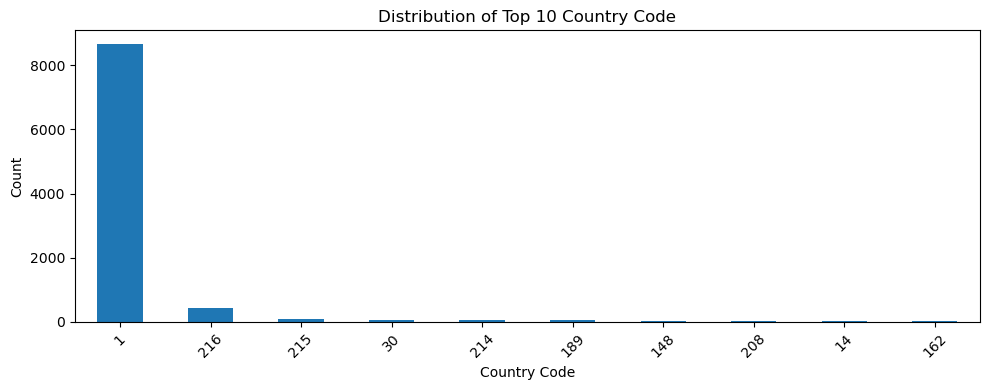

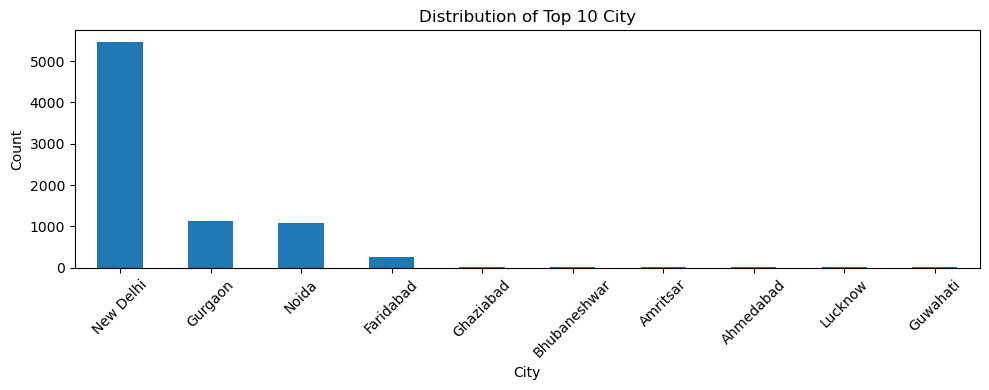

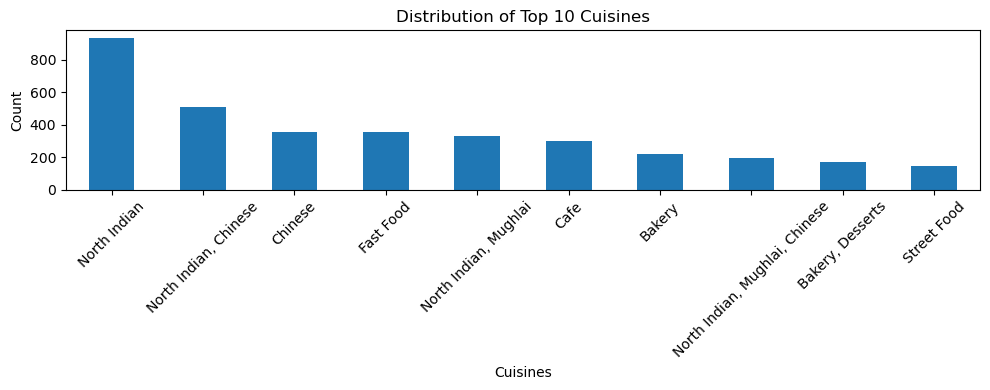

In [11]:
## Distribution of Categorical Variables
categorical_cols = ['Country Code', 'City', 'Cuisines']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribution of Top 10 {col}')
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#  Top Cuisines and Cities

In [12]:
##  Top Cuisines and Cities
top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines:")
print(top_cuisines)

Top 10 Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [13]:
top_cities = df['City'].value_counts().head(10)
print("Top 10 Cities:")
print(top_cities)

Top 10 Cities:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


#  Conclusion


1.Descriptive statistics revealed insights into key metrics like average cost, ratings, and votes, highlighting the variability in restaurant performance.

2.The top cities with the highest number of restaurants were New Delhi, Gurgaon, and Noida.

3.The most commonly listed cuisines included North Indian, Chinese, and Fast Food, indicating a strong demand for diverse food options.